### State Schema with Data Classes

In [52]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    gane:Literal["cricket","badminton"]

In [53]:
def play_game(state:TypeDictState):
    print("Play Game node has been called")
    return {"name":state["name"]+ " don't want to play  "}

def cricket(state:TypeDictState):
    print("cricket node has been called")
    return {"name":state['name'] , "game":"cricket"}

def badminton(state:TypeDictState):
    print("badminton node has been called")
    return {"name":state['name'] ,"game":"badminton"}

In [54]:
def decide_play(state:TypeDictState)->Literal["cricket","badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

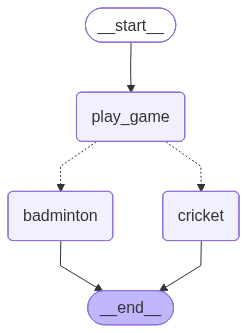

In [55]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypeDictState)
builder.add_node("play_game",play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
graph.invoke({"name":"Harish"})

Play Game node has been called
badminton node has been called


{'name': "Harish don't want to play  "}

In [95]:
### Pydantic
from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["cricket","badminton"]



In [96]:
def play_game(state:DataClassState):
    print("Play Game node has been called")
    return {"name":state.name + " don't want to play  "}

def cricket(state:DataClassState):
    print("cricket node has been called")
    return {"name":state.name + "cricket" ,"game":"cricket"}

def badminton(state:DataClassState):
    print("badminton node has been called")
    return {"name":state.name + "badminton" ,"game":"badminton"}

In [97]:
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

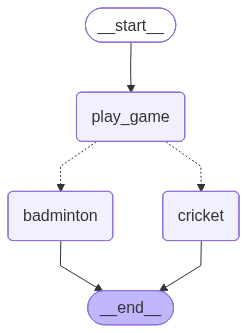

In [98]:
import random
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
builder=StateGraph(DataClassState)
builder.add_node("play_game",play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [99]:
graph.invoke(DataClassState(name="Harish",game="cricket"))

Play Game node has been called
cricket node has been called


{'name': "Harish don't want to play  cricket", 'game': 'cricket'}